# Function creation notebook

## Table of Contents
* [Website Screenshot Function](#screenshot)
## Website Screenshot Function<a class="anchor" id="screenshot"></a>

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager


def website_screenshot(url : str, suffix_name : str,width : int = 1920,
                       height : int = 1080,full_website : bool = False ) -> None:

    options = webdriver.ChromeOptions()
    options.headless = True

    driver = webdriver.Chrome(ChromeDriverManager().install() ,options=options)
    driver.get(url)
    driver.set_window_size(width, height)


    if full_website :
        S = lambda X: driver.execute_script('return document.body.parentNode.scroll'+X)
        driver.set_window_size(S('Width'),S('Height')) # May need manual adjustment                                                                                                                
        driver.get_screenshot_as_file(f'full_website_screenshot_{suffix_name}.png')
    else:
        driver.get_screenshot_as_file(f'visible_website_screenshot_{suffix_name}.png')


    driver.quit()

website_screenshot(url='https://afoi-papoutsi.gr/',suffix_name='papoutsis',full_website=True)
website_screenshot(url='https://afoi-papoutsi.gr/',suffix_name='papoutsis',full_website=False)

: 

In [2]:
import pytesseract
import cv2
import re
import nltk 
from collections import Counter
from nltk.corpus import stopwords
nltk.download("stopwords")
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer

from wordcloud import WordCloud, STOPWORDS


def extract_word_count(url : str, suffix_name : str,width : int = 1920,
                       height : int = 1080,full_website : bool = False ):

    website_screenshot(url,suffix_name,width,height,full_website)
    if full_website :
        img_path_name = f'full_website_screenshot_{suffix_name}.png'
    else :
        img_path_name =  f'visible_website_screenshot_{suffix_name}.png'
    
    img = cv2.imread(img_path_name)
    custom_config = r'--oem 3 --psm 6'
    website_text = pytesseract.image_to_string(img, config=custom_config)
    website_text = website_text.lower()

    for character in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n©»«™—':
        website_text = website_text.replace(character,' ')
    website_text = re.sub(' +', ' ', website_text)
        

    word_tokens = nltk.word_tokenize(website_text)
    stop = set(stopwords.words("english"))
    word_tokens = [word for word in word_tokens if word not in stop]
    word_tokens = [word for word in word_tokens if len(word)>1]

    website_text = TreebankWordDetokenizer().detokenize(word_tokens)
    
    word_count = Counter(word_tokens)

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(website_text)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

    return word_count.most_common()

                       

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pisolutions/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/var/folders/zx/bff9jv7n5s1167qcntm73jwc0000gq/T/ipykernel_92433/3124840976.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install() ,options=options)


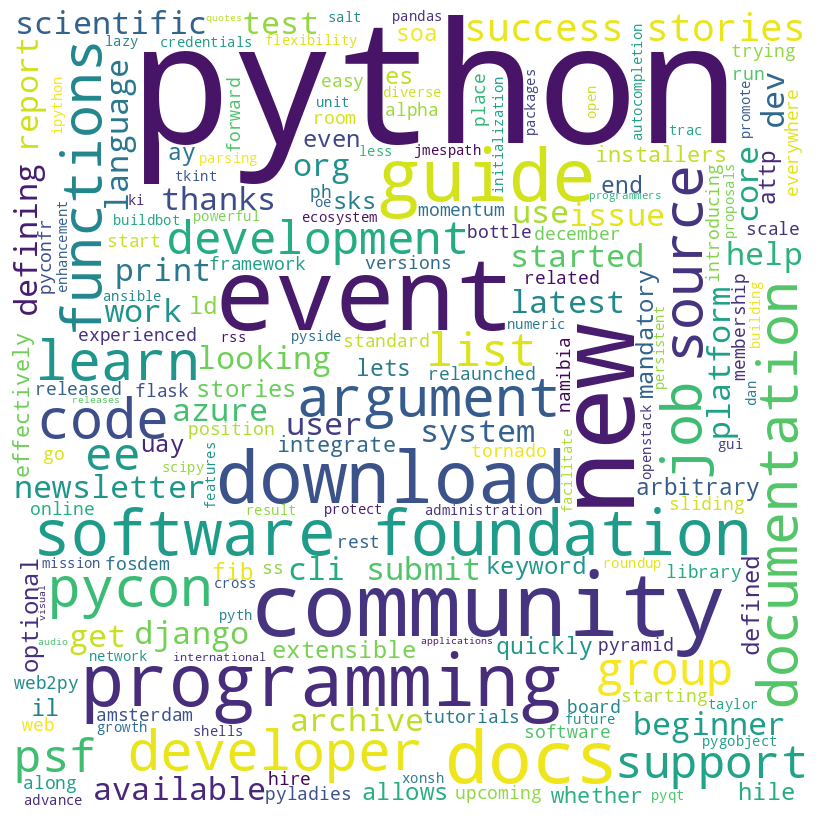

[('python', 36),
 ('2023', 14),
 ('news', 7),
 ('events', 7),
 ('community', 6),
 ('software', 5),
 ('stories', 4),
 ('programming', 4),
 ('docs', 4),
 ('12', 4),
 ('02', 4),
 ('2022', 4),
 ('foundation', 4),
 ('documentation', 3),
 ('success', 3),
 ('functions', 3),
 ('learn', 3),
 ('source', 3),
 ('code', 3),
 ('developer', 3),
 ('guide', 3),
 ('01', 3),
 ('pycon', 3),
 ('development', 3),
 ('ee', 3),
 ('psf', 3),
 ('downloads', 2),
 ('core', 2),
 ('defining', 2),
 ('arguments', 2),
 ('lists', 2),
 ('print', 2),
 ('21', 2),
 ('language', 2),
 ('work', 2),
 ('get', 2),
 ('started', 2),
 ('download', 2),
 ('jobs', 2),
 ('new', 2),
 ('looking', 2),
 ('available', 2),
 ('use', 2),
 ('latest', 2),
 ('org', 2),
 ('beginner', 2),
 ('10', 2),
 ('25', 2),
 ('django', 2),
 ('thanks', 2),
 ('dev', 2),
 ('22', 2),
 ('newsletter', 2),
 ('azure', 2),
 ('cli', 2),
 ('support', 2),
 ('scientific', 2),
 ('help', 2),
 ('report', 2),
 ('user', 2),
 ('group', 2),
 ('issue', 2),
 ('archive', 2),
 ('submi

In [3]:
extract_word_count(url='https://www.python.org',suffix_name='python',full_website=True)